In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

In [4]:
fake_df.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake_df['target'] = 0
real_df['target'] = 1

In [6]:
df = fake_df.append(real_df)
df = df.sample(frac=1)
df = df.reset_index(drop=True)

<ipython-input-6-9a57a322ad1d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = fake_df.append(real_df)


In [7]:
df.head(10)

,title,text,subject,date,target
0,UPDATED VIDEO: IS THIS AMERICA? CONSERVATIVES ...,This story should send chills down the spine o...,politics,"Apr 21, 2015",0
1,U.S. quits talks on global migration pact over...,UNITED NATIONS (Reuters) - The United States h...,worldnews,"December 3, 2017",1
2,Philippine mobile phone trader 'collected fund...,MANILA (Reuters) - Philippine security forces ...,worldnews,"October 27, 2017",1
3,VIOLENT ENVIRONMENTAL LUNATICS Cost Taxpayers ...,Environmental Protection Agency administrator ...,politics,"Nov 2, 2017",0
4,The NRA Is ‘Proud’ That They Just Made A Vira...,"The National Rifle Association, who has become...",News,"June 29, 2017",0
5,Even The Pope Is F*cking Trump Up On Twitter ...,Donald Trump has taken a beating on his favori...,News,"March 19, 2017",0
6,The Numbers Are In And Jon Ossoff Losing The ...,"Last Tuesday, Georgia held a special election ...",News,"June 26, 2017",0
7,The Changing Face of Mainstream Media?,21st Century Wire says One of the biggest tren...,US_News,"February 17, 2017",0
8,HOUSE ISSUES SUBPOENAS for Key Obama Administr...,Finally! Remember when Senator Lyndsey Graham ...,Government News,"May 31, 2017",0
9,HYPOCRITES! CHECK OUT Massive Structure Party ...,It s interesting how the media has completely ...,left-news,"Jul 24, 2016",0


In [8]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [9]:
df.replace({"politicsNews": "politics-news", 'politics': 'politics-news'}, inplace=True)

In [10]:
df['subject'].value_counts()

politics-news      18113
worldnews          10145
News                9050
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
def process_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha()]
    
    # Lemmatize the remaining tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Remove duplicate tokens
    unique_tokens = list(set(lemmatized_tokens))
    
    # Join the unique tokens back into a string
    processed_text = " ".join(unique_tokens)
    
    return processed_text

In [13]:
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

In [14]:
batch_size = 1000

# Get the number of rows in the dataframe
num_rows = df.shape[0]

# Loop through the data in batches
for i in range(0, num_rows, batch_size):
    # Get the current batch
    batch = df.loc[i:i+batch_size-1, 'title']

    # Process the current batch
    processed_batch = batch.apply(process_text)

    # Update the original dataframe with the processed data
    df.loc[i:i+batch_size-1, 'clean_title'] = processed_batch

In [15]:
df['article'] = df['title'] + " " + df['text']

In [16]:
df['article'].iloc[0]

'UPDATED VIDEO: IS THIS AMERICA? CONSERVATIVES And Their Families Experience SHOCKING ABUSE And SHAMING In Their Homes Ordered By Leftist DA As Part Of Insane Vendetta This story should send chills down the spine of every American. Communism is on our doorstep THEY CAME WITH A BATTERING RAM. Cindy Archer, one of the lead architects of Wisconsin s Act 10   also called the  Wisconsin Budget Repair Bill,  it limited public-employee benefits and altered collective-bargaining rules for public-employee unions   was jolted awake by yelling, loud pounding at the door, and her dogs  frantic barking. The entire house   the windows and walls   was shaking.She looked outside to see up to a dozen police officers, yelling to open the door. They were carrying a battering ram. She wasn t dressed, but she started to run toward the door, her body in full view of the police. Some yelled at her to grab some clothes, others yelled for her to open the door. I was so afraid,  she says.  I did not know what t

In [17]:
df['title'].iloc[2]

"Philippine mobile phone trader 'collected funds' for Marawi attackers"

In [19]:
df['clean_title'].iloc[2]

'marawi mobile phone fund trader attacker philippine'

In [20]:
df.columns

Index(['title', 'text', 'subject', 'date', 'target', 'clean_title', 'article'], dtype='object')

In [21]:
def count_subjects(data):
  return data['subject'].count()

In [22]:
subjects = df.groupby('subject').apply(count_subjects).reset_index(name='count')

In [23]:
subjects

,subject,count
0,Government News,1570
1,Middle-east,778
2,News,9050
3,US_News,783
4,left-news,4459
5,politics-news,18113
6,worldnews,10145


In [24]:
fig1 = px.bar(subjects, x='subject', y='count', color='subject')
fig1.show()

In [25]:
import dateutil.parser

def convert_year(data):
  try:
    return dateutil.parser.parse(data).strftime("%Y-%m")
  except:
    pass

In [26]:
real_df['dates'] = real_df['date'].apply(convert_year)
fake_df['dates'] = real_df['date'].apply(convert_year)

In [27]:
def count_years(data):
  return data['dates'].count()

In [28]:
fake_news_years = fake_df.groupby('dates').apply(count_years).reset_index(name='count')

In [29]:
fig3 = px.line(fake_news_years, x='dates', y='count', 
               hover_data={"dates": "|%B, %Y"}, 
               title='Fake news Over time')

fig3.show()

In [30]:
def count_target(data):
  return data['target'].count()

In [31]:
targets = df.groupby('target').apply(count_target).reset_index(name='count')

In [32]:
targets

,target,count
0,0,23481
1,1,21417


In [33]:
fig2 = px.bar(targets, x='target', y='count', color='target')
fig2.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_title'], df['target'], test_size=0.3, random_state=15)

In [35]:
tf = TfidfVectorizer()
x_train_vec = tf.fit_transform(X_train)
x_test_vec = tf.transform(X_test)

In [36]:
print(x_train_vec.shape, y_train.shape)
print(x_test_vec.shape, y_test.shape)

(31428, 15409) (31428,)
(13470, 15409) (13470,)


In [37]:
model = LogisticRegression()
model.fit(x_train_vec, y_train)

LogisticRegression()

In [38]:
pred = model.predict(x_test_vec)
score = roc_auc_score(y_test, pred)

In [39]:
score

0.9437324812972746

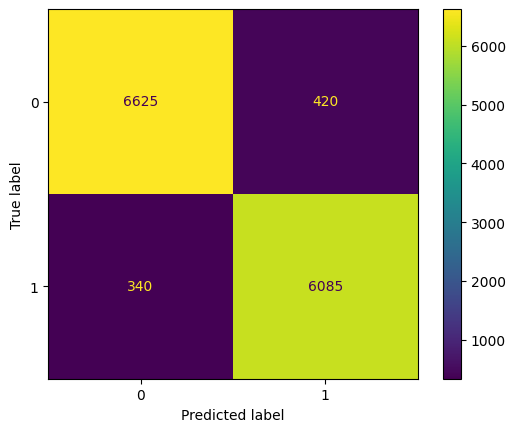

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

plt.show()

In [41]:
def process_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalpha()]
    
    # Lemmatize the remaining tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Remove duplicate tokens
    unique_tokens = list(set(lemmatized_tokens))
    
    # Join the unique tokens back into a string
    processed_text = " ".join(unique_tokens)
    
    return processed_text


In [42]:
batch_size = 1000

# Get the number of rows in the dataframe
num_rows = df.shape[0]

# Loop through the data in batches
for i in range(0, num_rows, batch_size):
    # Get the current batch
    batch = df.loc[i:i+batch_size-1, 'text']

    # Process the current batch
    processed_batch = batch.apply(process_text)

    # Update the original dataframe with the processed data
    df.loc[i:i+batch_size-1, 'text'] = processed_batch

In [43]:
df['text'].iloc[0]

'accountability blamed balance raid wondered candidate due screened witnessed claiming chanting swarming standard looking protected business claim citizen chill warrant late record key early challenge invasion emerged resident outcome fundamental republican fresh america raided technocratic see found need updated described prosecution wake principal important partner depleted taking another since virtually money mix kid comprehensive video damaged confidential copy hate searched expansive doorstep recusal peterson handcuff trouble front ominous keeping domestic answer proved fact violating floor bringing go matter formally support teacher secret core ultimately eighteen warning leading lawyer review reason ruined led illegal remarkably supporter command protect bill activity launched television budget serious every subpoenaed shower professional superhuman recused police others abuse misconduct anxiety complaint paralyzed dressed concept issuing however purple often story forced growth

In [44]:
df['text'].iloc[0]

'accountability blamed balance raid wondered candidate due screened witnessed claiming chanting swarming standard looking protected business claim citizen chill warrant late record key early challenge invasion emerged resident outcome fundamental republican fresh america raided technocratic see found need updated described prosecution wake principal important partner depleted taking another since virtually money mix kid comprehensive video damaged confidential copy hate searched expansive doorstep recusal peterson handcuff trouble front ominous keeping domestic answer proved fact violating floor bringing go matter formally support teacher secret core ultimately eighteen warning leading lawyer review reason ruined led illegal remarkably supporter command protect bill activity launched television budget serious every subpoenaed shower professional superhuman recused police others abuse misconduct anxiety complaint paralyzed dressed concept issuing however purple often story forced growth

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.3, random_state=15)

In [46]:
print(X_train.shape, y_train.shape)

(31428,) (31428,)


In [47]:
print(X_test.shape, y_test.shape)

(13470,) (13470,)


In [48]:
tf = TfidfVectorizer()
X_train_vec = tf.fit_transform(X_train)
X_test_vec = tf.transform(X_test)

In [49]:
print(X_train_vec.shape, y_train.shape)

(31428, 80376) (31428,)


In [50]:
print(X_test_vec.shape, y_test.shape)

(13470, 80376) (13470,)


In [51]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [52]:
pred = model.predict(X_test_vec)
acc = roc_auc_score(y_test, pred)

In [53]:
acc

0.9899779350644689

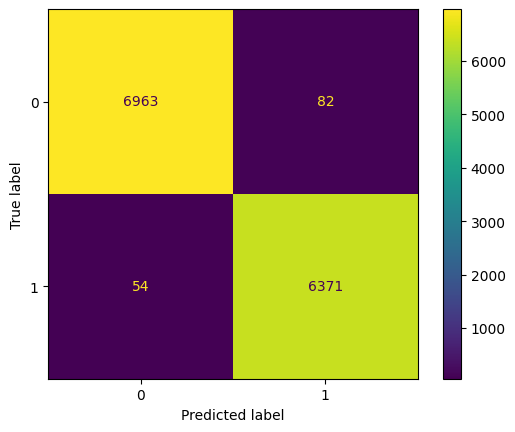

In [54]:
cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

plt.show()

In [55]:
df.columns

Index(['title', 'text', 'subject', 'date', 'target', 'clean_title', 'article'], dtype='object')

In [56]:
batch_size = 1000

# Get the number of rows in the dataframe
num_rows = df.shape[0]

# Loop through the data in batches
for i in range(0, num_rows, batch_size):
    # Get the current batch
    batch = df.loc[i:i+batch_size-1, 'article']

    # Process the current batch
    processed_batch = batch.apply(process_text)

    # Update the original dataframe with the processed data
    df.loc[i:i+batch_size-1, 'clean_article'] = processed_batch

In [57]:
df.columns

Index(['title', 'text', 'subject', 'date', 'target', 'clean_title', 'article',
       'clean_article'],
      dtype='object')

In [58]:
df['clean_article'].head(10)

0    accountability blamed balance raid wondered ca...
1    guterres decision hope noted predecessor despe...
2    phone running oscar present philippine lily do...
3    taxpayer board environmental claiming columnis...
4    clenched fantastic fascist term fist handle th...
5    anything xenophobe thing around brown love liv...
6    blamed candidate among quite vacuum compared l...
7    election taken also running century news press...
8    attention phone hope senator cnn circumstance ...
9    temporary familiar around foot interesting lif...
Name: clean_article, dtype: object

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_article'], df['target'], random_state=15, test_size=0.33)

In [60]:
X_train_vec = tf.fit_transform(X_train)
X_test_vec = tf.transform(X_test)

In [61]:
print(X_train_vec.shape, X_test_vec.shape)

(30081, 79155) (14817, 79155)


In [62]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [63]:
pred = model.predict(X_test_vec)
score = roc_auc_score(y_test, pred)

In [64]:
score

0.9902934294652498

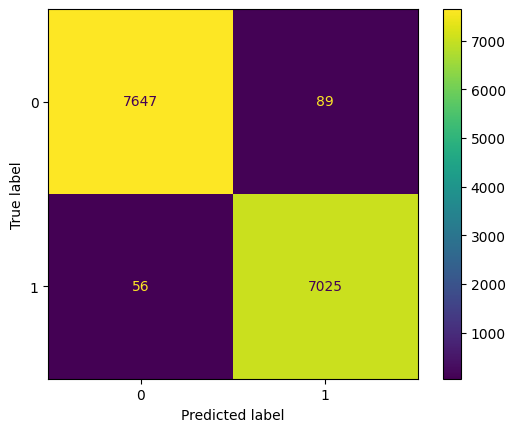

In [65]:
cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

plt.show()